# An example of using candex with regular Latitude and Longitude
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

No temporary folder is provided for candex; this will result in candex saving the files in the same directory as python script
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no fields are provided for ID, lat, lon and will assign those by itself


/Users/shg096/Desktop/candex_newgen/candex/candex.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # centroid lat from target
/Users/shg096/Desktop/candex_newgen/candex/candex.py:103: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t'] = shp.centroid.x # centroid lon from target


candex will save standard shapefile for candex claculation as:
ERA5_Medicine_Hat_target_shapefile.shp
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
candex detects that the longitude varibales has dimensions of:
['longitude']
candex detects that the latitude varibales has dimensions of:
['latitude']
candex detects case 1 - regular lat/lon
candex is creating the shapefile from the netCDF file and saving it here:
ERA5_Medicine_Hat_source_shapefile.shp
candex decides the netCDF file has longtitude values of -180 to 180; creating the extended
candex saved the expanded shapefile at:
ERA5_Medicine_Hat_source_shapefile_expanded.shp


/Users/shg096/Desktop/candex_newgen/candex/candex.py:502: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:506: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:601: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/Desktop/candex_newgen/candex/candex.py:605: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.Ge

Remapping ../data/ERA5_SSR_at_MedicineHat/source_nc/ERA5_NA_19790101.nc to ../output/1979-01-01-00-00-00.nc
Started at date and time 2021-01-23 11:22:11.622592
Ended   at date and time 2021-01-23 11:22:11.838947
Remapping ../data/ERA5_SSR_at_MedicineHat/source_nc/ERA5_NA_19790102.nc to ../output/1979-01-02-00-00-00.nc
Started at date and time 2021-01-23 11:22:11.844040
Ended   at date and time 2021-01-23 11:22:12.044159
Remapping ../data/ERA5_SSR_at_MedicineHat/source_nc/ERA5_NA_19790103.nc to ../output/1979-01-03-00-00-00.nc
Started at date and time 2021-01-23 11:22:12.049416
Ended   at date and time 2021-01-23 11:22:12.256545


<AxesSubplot:>

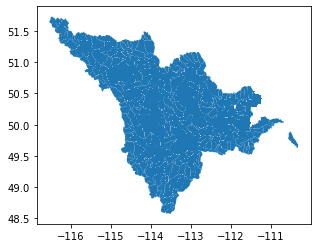

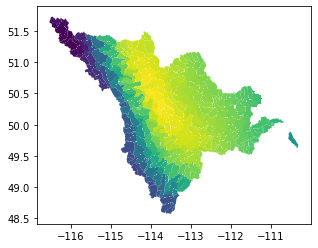

In [1]:
from candex import candex

cndx = candex()  # initialize candex object
cndx.name_of_case = 'ERA5_Medicine_Hat'
cndx.name_of_target_shp = '../data/ERA5_SSR_at_MedicineHat/target_shp/South_Saskatchewan_MedicineHat.shp'
cndx.name_of_nc_files = '../data/ERA5_SSR_at_MedicineHat/source_nc/ERA5_NA_*.nc'
cndx.name_of_var_name = ['airtemp','pptrate']
cndx.name_of_var_lon = 'longitude' 
cndx.name_of_var_lat = 'latitude'
cndx.name_of_var_time = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list          =  ['f4','f4']
cndx.fill_value_list     = ['-9999.00','-9999.00']

# execute candex
cndx.run_candex()

# visualize the result
import geopandas as gpd
import xarray as xr
shp = gpd.read_file('../data/ERA5_SSR_at_MedicineHat/target_shp/South_Saskatchewan_MedicineHat.shp')
shp.plot()
ds = xr.open_dataset('../output/1979-01-01-00-00-00.nc')
shp['value'] = ds.airtemp[1,:]
shp.plot(column= 'value')